In [1]:
#pca ve kernel pca karşılaştırılması

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [3]:
X,y = make_circles(n_samples=1_000,factor=0.3,noise=0.05,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,random_state=0) 

In [4]:
import matplotlib.pyplot as plt

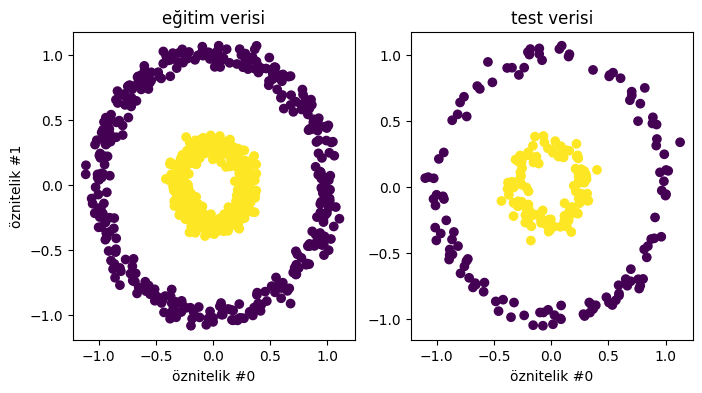

In [9]:
_, (train_ax, test_ax) = plt.subplots(ncols=2,sharex=True,figsize=(8,4))

train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train)

train_ax.set_ylabel("öznitelik #1")
train_ax.set_xlabel("öznitelik #0")
train_ax.set_title("eğitim verisi")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
test_ax.set_xlabel("öznitelik #0")
test_ax.set_title("test verisi")

plt.show()

In [16]:
from sklearn.decomposition import PCA, KernelPCA

In [17]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components= None, kernel = "rbf",gamma=10,fit_inverse_transform = True, alpha= 0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'Test Verisinin\n KernelPCA ile Projeksiyonu')

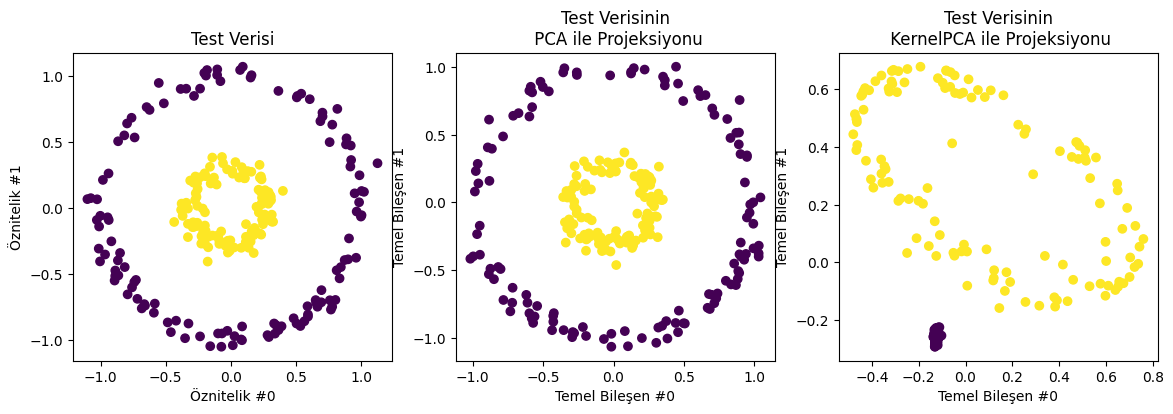

In [19]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots( 
    ncols=3, figsize=(14, 4) ) 

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test) 
orig_data_ax.set_ylabel("Öznitelik #1") 
orig_data_ax.set_xlabel("Öznitelik #0") 
orig_data_ax.set_title("Test Verisi") 

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test) 
pca_proj_ax.set_ylabel("Temel Bileşen #1") 
pca_proj_ax.set_xlabel("Temel Bileşen #0") 
pca_proj_ax.set_title("Test Verisinin\n PCA ile Projeksiyonu") 

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1],c=y_test)
kernel_pca_proj_ax.set_ylabel("Temel Bileşen #1")
kernel_pca_proj_ax.set_xlabel("Temel Bileşen #0") 
kernel_pca_proj_ax.set_title("Test Verisinin\n KernelPCA ile Projeksiyonu")

In [20]:
#reconstruction - geri oluşturma

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

Text(0.5, 1.0, 'KernelPCA ile Geri Oluşturulmuş Test verileri')

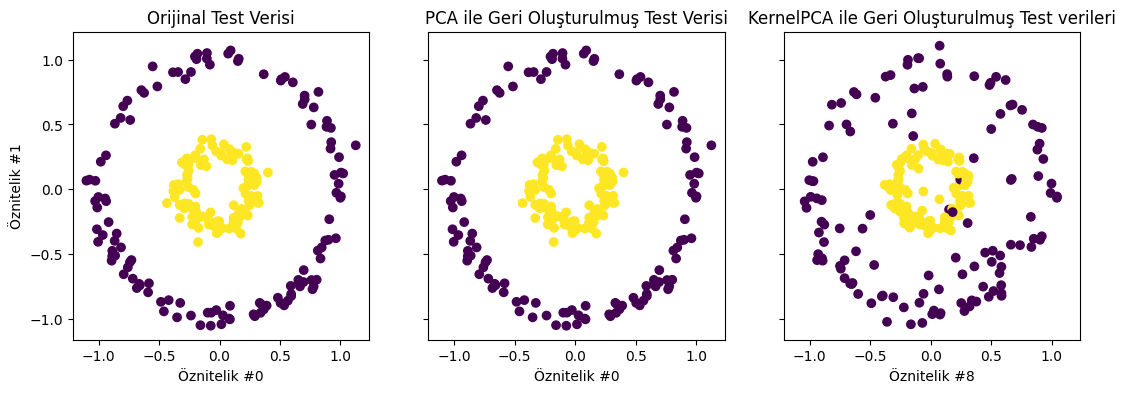

In [21]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots( 
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test) 
orig_data_ax.set_ylabel("Öznitelik #1") 
orig_data_ax.set_xlabel("Öznitelik #0") 
orig_data_ax.set_title("Orijinal Test Verisi") 

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1 ],c= y_test)
pca_back_proj_ax.set_xlabel("Öznitelik #0") 
pca_back_proj_ax.set_title("PCA ile Geri Oluşturulmuş Test Verisi") 

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test 
) 

kernel_pca_back_proj_ax.set_xlabel("Öznitelik #8") 
kernel_pca_back_proj_ax.set_title("KernelPCA ile Geri Oluşturulmuş Test verileri")

In [22]:
#boyut indirgeme yaptıktan sonra geri dönüldüğünde verinin bozulduğunu gözlemleriz